# 분류 알고리즘

분류 문제에 다양한 머신러닝 모델을 사용하여 해결합니다. 

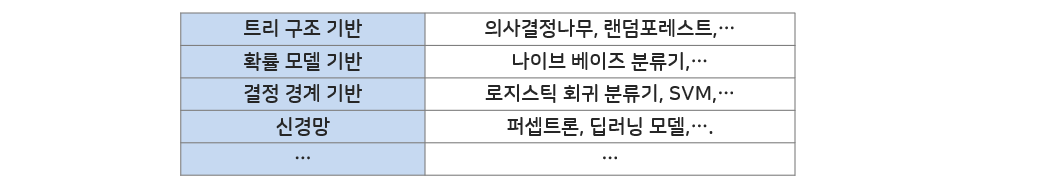

# 결정 트리(Decision Tree)

* 스무고개와 같이 특정 질문들을 통해 정답을 찾아가는 모델입니다. 
* 최상단의 뿌리마디에서 마지막 끝 마디까지 아래 방향으로 성장합니다. 
* 질문을 할 대상, 즉 일부 특성(featuer)을 무작위로 고른 다음 이중에서 최선의 분할을 찾으며 트리를 만듭니다. 
* 최선의 분할은 데이터가 균일해지도록 (순도가 높아짐, 불순도가 낮아짐) 분리기준을 잡습니다. 
* 불순도(Impurity)값에 의해 분리됩니다. 

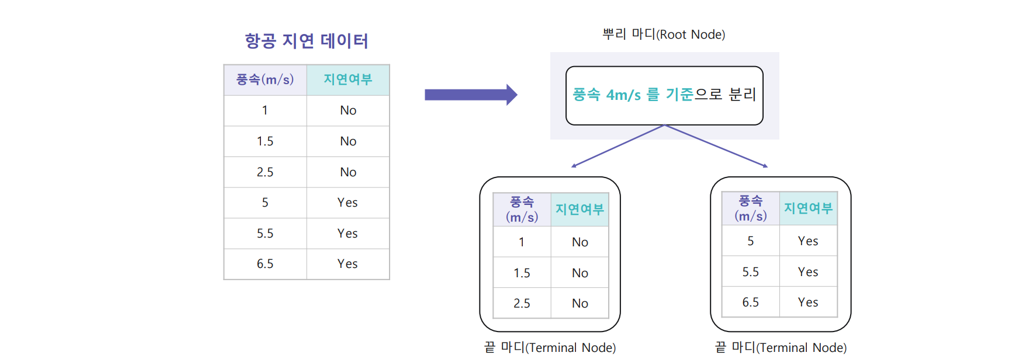

---

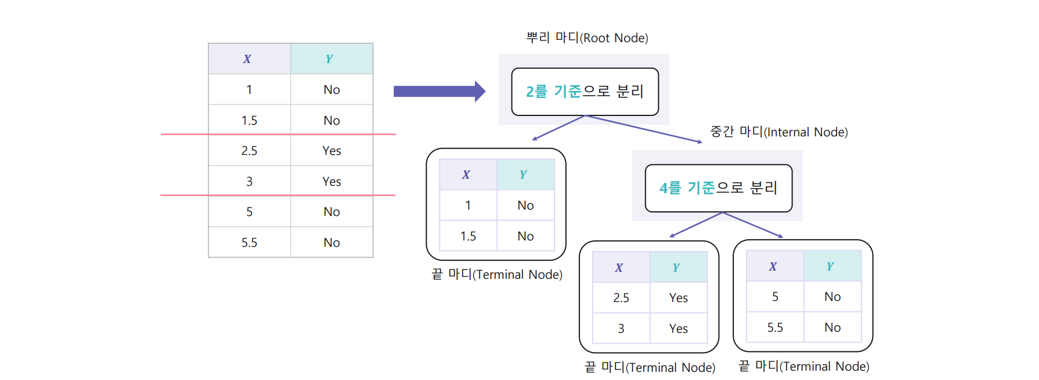

> * 일단 2를기준으로 나눔. 
> * 4를 기준으로 분리
> * 마지막 데이터들은 순수한데이터라 할 수 있다.

> * 새로운 데이터 2.8이 들어옴 ==> 4의 왼쪽 노드를 보고 지연이 된다고 얘기할 수 있음.

<div class="alert alert-block" style="background-color:#F255BB66">
<font size="3em" style="font-weight:bold;color:000000;">질문</font><br>
분리기준에 따라 결정트리의 성능이 좌우된다고 하는데<br>
그럼,분리기준은 어떻게 정해지는 것일까?
</div>  

### 분리기준

* 불순도 : 다른 데이터가 섞여 있는 정도
* 지니 불순도(Gini Impurity)가 가장 낮은값을 갖는 기준으로 결정트리를 성장시킵니다. 
* 정보이득(Information Gain)이 높은 값을 갖는 기준으로 결정트리를 성장시킵니다. 
    * 정보이득 = 1- 엔트로피(혼잡도)


* 즉, 불순한 것이 사라지도록 또는 정보가 점점 순수해져 분명하게 얻는 정보가 많아지도록 분리 기준을 잡습니다.   


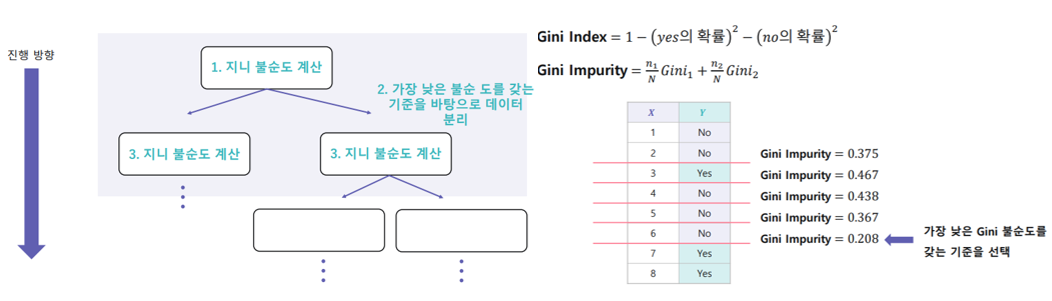

내부적으로연산이 많아 성능에 대해 얘기를 많이한다.(cpu등)

### 결정트리의 하이퍼파라미터 (알고리즘을 호출할때 훈련정도를 사람이 정해줌.)

* 결정트리를 사용하는데 있어 사람이 설정할 수 있는 파라미터가 있습니다.
* 이것을 **하이퍼파라미터**라고 합니다. 
* 트리가 너무 많이 성장해 모델이 복잡해지고 이것은 과적합을 일으킵니다. 
* 그래서 어느 정도 일반화를 반영할 수 있는 선에서 트리의 성장을 중단시켜야 하는데,
* 중단시키기 위한 여러가지 파라미터가 있습니다. 
* 아래의 파라미터를 보고 상황에 맞게 사용하면 됩니다. 

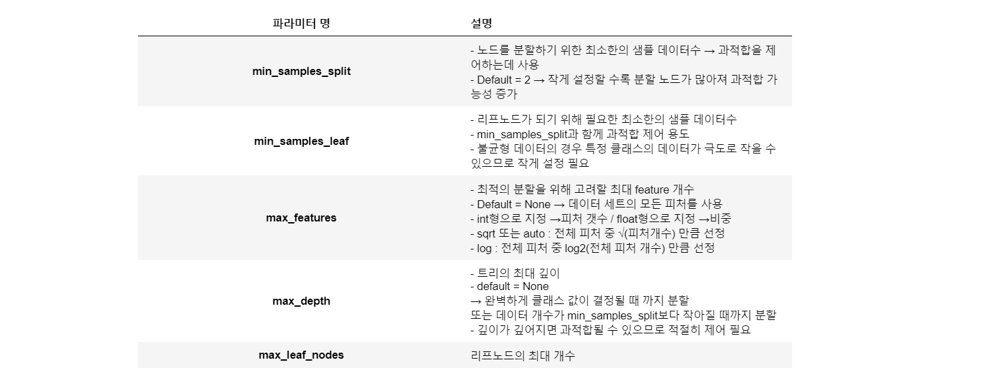

---

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

Mounted at /content/drive
/content/drive/Othercomputers/내 노트북/Devpy_work/02.멀티캠퍼스


In [3]:
!pip install -U seaborn

     -------------------------------------- 285.1/285.1 kB 5.8 MB/s eta 0:00:00


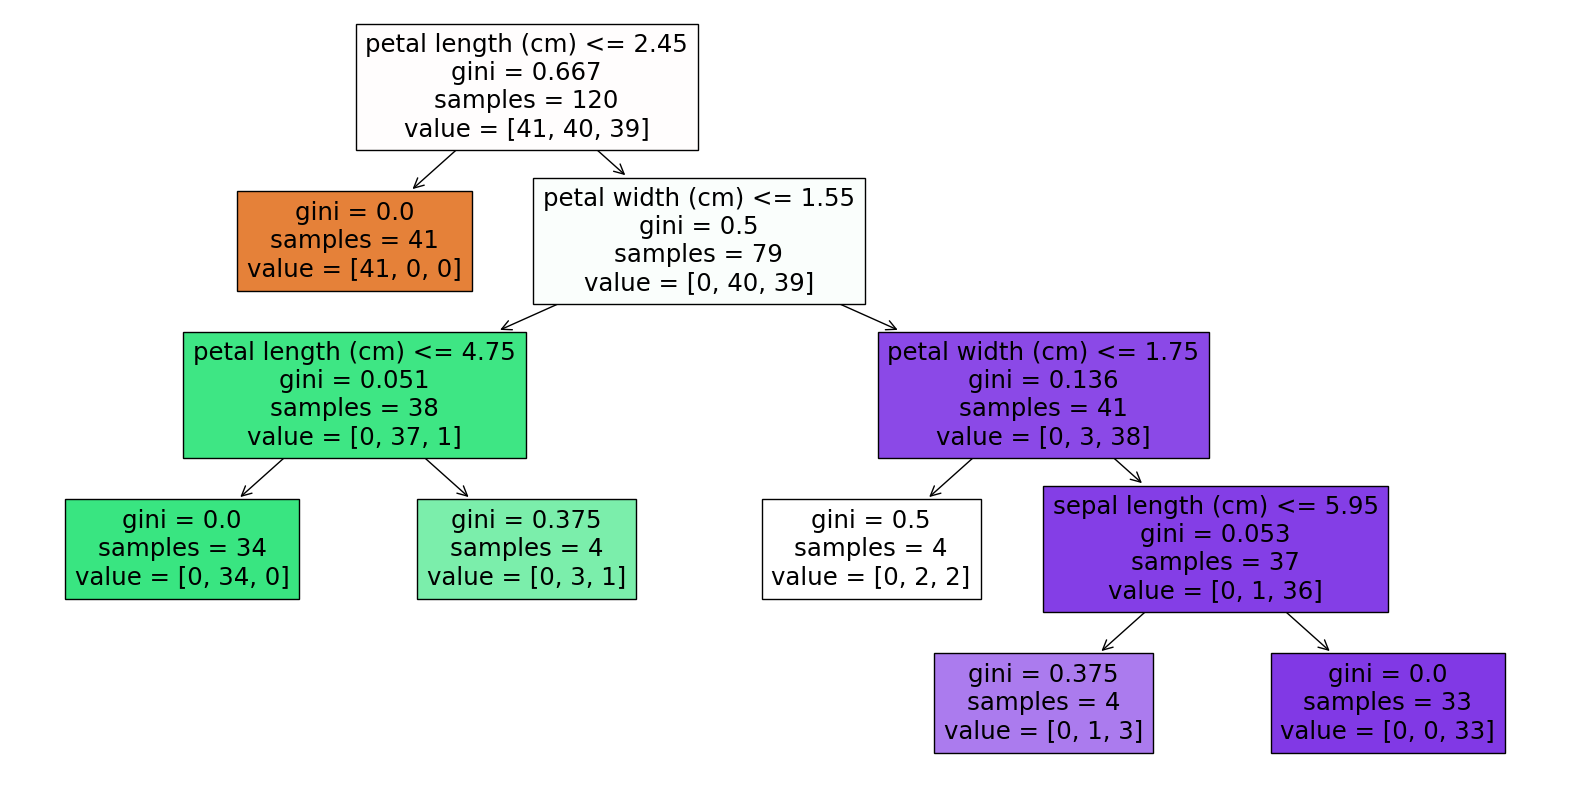

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=11)

# DecisionTree Classifier 생성
# dt_clf = DecisionTreeClassifier(random_state=156,max_depth=3) # 트리성장 깊이 조절
# dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=3) # 리프노드의 최소 샘플 수
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=4,max_depth=6) # 리프노드 & 트리성장 깊이 조절 중 어느것이 우선?

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

#트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dt_clf,filled=True, feature_names=iris_data.feature_names)

plt.show()

-- dt_clf = DecisionTreeClassifier(random_state=156,max_depth=3)  
트리성장 깊이 조절
> * 제일 위는 루트노드
> * petal length 2.45를 기준으로 노드
> * gini : 데이터가 얼마나 순수한지 ? 0.0 순수 // 0.5 50%의 불순물이 있다고 볼 수 있다.
> * samples = 79개의 샘플이 노드로옴.
> * value = 샘플을 내부 기준으로 나눈듯 [40개,0,0] 순수 [0,37,1] 순수하지만 1개의 불순물이 끼어있음.

-- dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=2)
리프노드의 value가 [0,2,0] 과 같이 2개가 될때까지 분리함.


-- dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=2,max_depth=2)
트리성장 & 리프노드 중 어느것이 우선적용(이득?)되는지?

---

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=11)

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [29]:
#결정트리모델의 평가
from sklearn.metrics import accuracy_score

#예측하기
pred = dt_clf.predict(X_test)

#평가하기
accuracy_score(y_test,pred)


0.9333333333333333

In [30]:
import pandas as pd
iris_df = pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

파라미터를 정해주지 않아서 5단계 까지 뻗어나감.

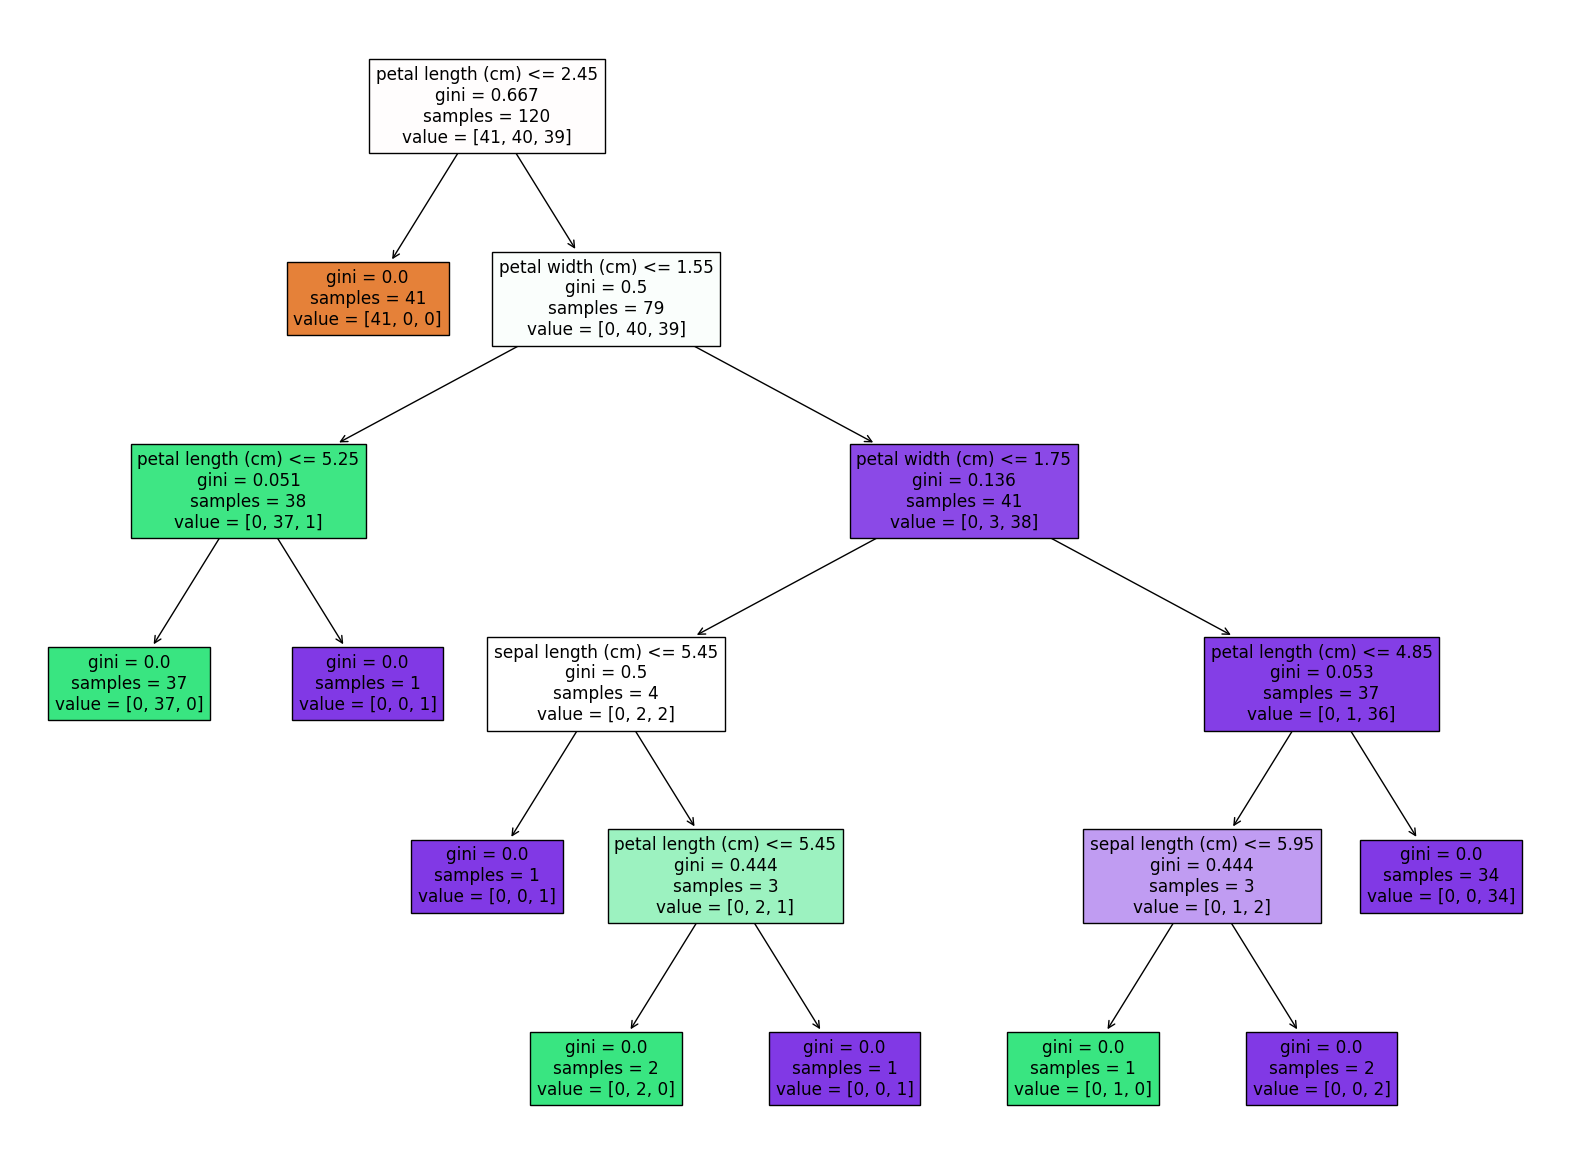

In [13]:
#사이킷런에서 모델을 그림으로 표현해 준다.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#트리 시각화
plt.figure(figsize=(20,15))

plot_tree(dt_clf,filled=True, feature_names=iris_data.feature_names)
plt.show()

<div class="alert alert-block" style="background-color:#409002;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">참고하세요</font><br>

**[장점]**
* 해석이 직관적이고 쉽습니다.
* 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않습니다. 


**[단점]**
* 과적합으로 알고리즘 성능이 떨어집니다.(조건이 엄격하기 때문에 생활 데이터를 적용시키기 힘듬.)
* 이를 극복하기 위해서 트리의 크기나 리프노드의 샘플 수 등 파라미터들을 제한하는 튜닝이 필요합니다. 
</div>  

### 결정트리의 부가기능(Feature importance)

* 결정트리는 분류예측 외에 피처 중요도 정보를 제공합니다. 
* 결정트리가 자동으로 분리기준을 찾고 분리해 나가면서 자주 사용되는 피처가 있습니다. 
* 이는 클래스의 값 결정에 영향을 많이 끼친다고 볼 수 있습니다. 
* 모델 학습에 영향도가 높은 피처들만 선택하여 학습시키고자 할 때 결정트리가 사용됩니다. 

In [32]:
#피처 중요도 정보
dt_clf.feature_importances_ #0.55490281,이게 제일 중요하다고 나옴 (petal length) : q분류를 하는데 중요하다.

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [15]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

> * 붓꽃 종류를 결정하는 데 있어 가장 중요한 특성은 petal length이다. 
> * 지금은 피쳐의 수가 적지만, 
> * 피처의 수가 굉장히 많아 이 때문에 모델을 만드는데 시간과 자원이 많이 필요하고, 과적합도 쉽게 발생된다면
> * 중요한 피처만 남겨 처리하고 싶어집니다. 
> * 이때 트리계열의 클래스(알고리즘)을 사용하여 피쳐 중요도를 파악해 피쳐 셀렉션을 진행할 수 있다.


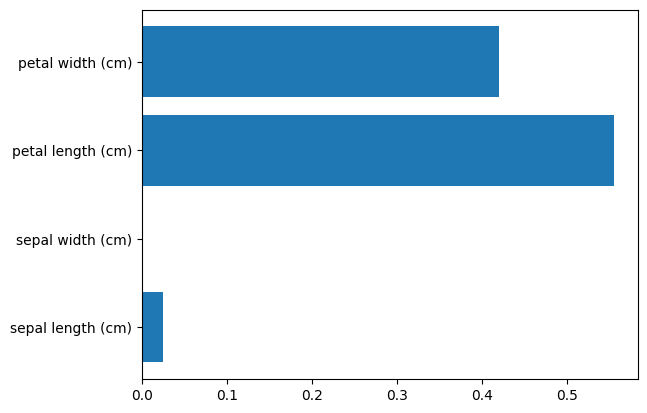

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# feature importance를 column 별로 시각화 하기 
# sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

plt.barh(range(len(dt_clf.feature_importances_)),dt_clf.feature_importances_ )
plt.yticks(range(len(dt_clf.feature_importances_)), iris_df.columns)
plt.show()

petal width 와 petal length 만으로 분류를 한다 할 수 있고 , 두 값만으로 결과를 낼 수 있을것 같다.

---
### 과적합(Overfitting)

* 트리모델의 과접합된 결과를 시각화하기 위해서 토이 데이터 셋을 만듭니다. 
* 2개의 Feature로 된 3개의 결정 클래스를 가지도록 수행하였습니다. 
* 아무런 제약없을 경우 세세하게 모든 경우를 분리하여 클래스로 분할하다 보니 오버피팅이 발생하였습니다. 
* min_sample_leaf=6으로 트리 성장에 제약을 설정하면, 예측 결과 오류의 경우도 발생하지만 좀더 일반화 성능이 높아집니다. 
* 리프 노드에 최소 6개의 샘플은 있어야 한다.

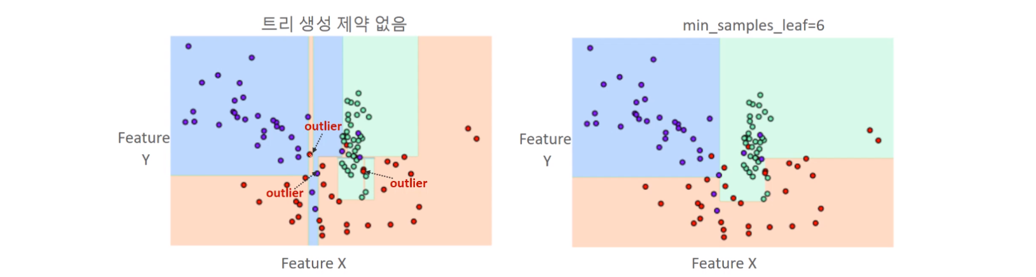

빨간색점 하나 (outlier) 때문에 분류기준선이 하나 생겼다.
* 분류기준선 위쪽에 파란색 점이 왔을 때 실제 파란색이지만 빨간색이라 결론이나올수있다.
> * 과적합을 하게되면 이러한 현상이 나올 수 있으니 조심하자!

* 러프한 데이터가 성능을 좋게 한다 할 수 있다.

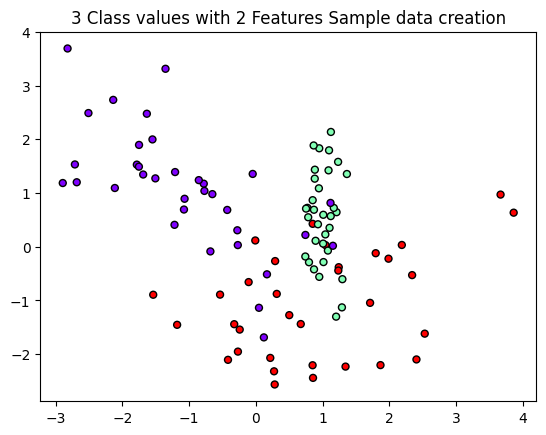

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [18]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

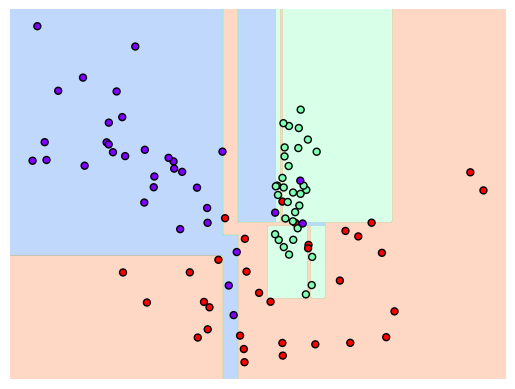

In [19]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

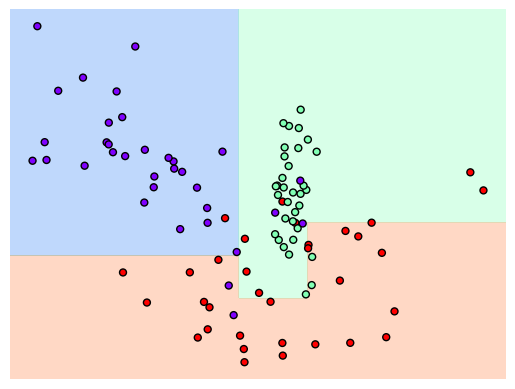

In [20]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

---